In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler # sklearn for models
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV

#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer, accuracy_score

#from keras.wrappers.scikit_learn import KerasClassifier


In [2]:
data = pd.read_csv("F:\\Intern projects\\Ransomware final.csv")
data.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.00000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.00000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.27273,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.00000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.50000,849,1300,72,18,1


In [3]:
df1 = pd.DataFrame(data,columns=["ResourcesMeanEntropy","ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","ResourcesMaxSize","LoadConfigurationSize","legitimate"])
df1['ID'] = df1.reset_index(drop=True).index + 1
df1.head()

,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,legitimate,ID
0,3.262823,2.568844,3.537939,8797.00000,216,18032,0,1,1
1,4.250461,3.420744,5.080177,837.00000,518,1156,72,1,2
2,4.426324,2.846449,5.271813,31102.27273,104,270376,72,1,3
3,4.364291,2.669314,6.400720,1457.00000,90,4264,72,1,4
4,4.306100,3.421598,5.190603,1074.50000,849,1300,72,1,5


In [4]:
null_values_column = df1['legitimate'].isnull().sum()
null_values_column

0

In [5]:
import random

def generate_data(num_samples, malware_probability):
    data = []
    for _ in range(num_samples):
        
        cpu_temperature = round(random.uniform(40, 80), 2)  # Random CPU temperature between 40°C and 80°C

        # Generate random CPU load between 0 and 100%
        cpu_load = random.uniform(0, 100)
        
        # Generate random idle time between 0 and 100%
        idle_time = random.uniform(0, 100)
        
        # Generate random clock readings (in GHz)
        clock_readings = random.uniform(1, 4)
        
        # Generate random memory usage (in GB)
        memory_usage = random.uniform(1, 16)
        
        # Determine if malware is present based on given probability
        malware_present = random.random() < malware_probability
        
        data.append((cpu_temperature,cpu_load, idle_time, clock_readings, memory_usage, malware_present))
    
    return data

# Generate 15,0000 samples with 30% probability of malware presence
dataset = generate_data(130000, 0.3)


In [6]:
df = pd.DataFrame(dataset, columns=['cpu_temperature','CPU Load (%)', 'Idle Time (%)', 'Clock Readings (GHz)', 'Memory Usage (GB)', 'Malware Present'])

# Display the DataFrame
print(df.head())

   cpu_temperature  CPU Load (%)  Idle Time (%)  Clock Readings (GHz)  \
0            68.04     26.952590       7.384035              2.351770   
1            68.17     89.337425       3.668171              3.559432   
2            50.13     27.151120      64.814387              2.143796   
3            49.20     51.370156      50.853750              2.121779   
4            49.28     52.638950       8.906024              2.701930   

   Memory Usage (GB)  Malware Present  
0          15.101969            False  
1           3.006194            False  
2           2.568121             True  
3           8.519494            False  
4           6.559320            False  


In [7]:
df['ID'] = df.reset_index(drop=True).index + 1

In [8]:
df.head()
#df.shape
# Idle Time (%)-the periods of time that the employee's computer is not being actively used.

,cpu_temperature,CPU Load (%),Idle Time (%),Clock Readings (GHz),Memory Usage (GB),Malware Present,ID
0,68.04,26.952590,7.384035,2.351770,15.101969,False,1
1,68.17,89.337425,3.668171,3.559432,3.006194,False,2
2,50.13,27.151120,64.814387,2.143796,2.568121,True,3
3,49.20,51.370156,50.853750,2.121779,8.519494,False,4
4,49.28,52.638950,8.906024,2.701930,6.559320,False,5


In [9]:
null_values_column = df['Memory Usage (GB)'].isnull().sum()
null_values_column 

0

In [10]:
connected_df = pd.concat([df, df1], ignore_index=True)

In [11]:
connected_df

,cpu_temperature,CPU Load (%),Idle Time (%),Clock Readings (GHz),Memory Usage (GB),Malware Present,ID,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,legitimate
0,68.04,26.952590,7.384035,2.351770,15.101969,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68.17,89.337425,3.668171,3.559432,3.006194,False,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50.13,27.151120,64.814387,2.143796,2.568121,True,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49.20,51.370156,50.853750,2.121779,8.519494,False,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49.28,52.638950,8.906024,2.701930,6.559320,False,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268042,NaN,NaN,NaN,NaN,NaN,NaN,138043,4.122736,1.370260,7.677091,14900.714290,16.0,81654.0,72.0,0.0
268043,NaN,NaN,NaN,NaN,NaN,NaN,138044,3.377663,2.031619,5.050074,6905.846154,44.0,67624.0,0.0,0.0
268044,NaN,NaN,NaN,NaN,NaN,NaN,138045,6.825406,2.617026,7.990487,14981.909090,48.0,22648.0,72.0,0.0
268045,NaN,NaN,NaN,NaN,NaN,NaN,138046,3.421627,2.060964,4.739744,601.600000,16.0,2216.0,0.0,0.0


In [12]:
connected_df.tail()

,cpu_temperature,CPU Load (%),Idle Time (%),Clock Readings (GHz),Memory Usage (GB),Malware Present,ID,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,legitimate
268042,NaN,NaN,NaN,NaN,NaN,NaN,138043,4.122736,1.370260,7.677091,14900.714290,16.0,81654.0,72.0,0.0
268043,NaN,NaN,NaN,NaN,NaN,NaN,138044,3.377663,2.031619,5.050074,6905.846154,44.0,67624.0,0.0,0.0
268044,NaN,NaN,NaN,NaN,NaN,NaN,138045,6.825406,2.617026,7.990487,14981.909090,48.0,22648.0,72.0,0.0
268045,NaN,NaN,NaN,NaN,NaN,NaN,138046,3.421627,2.060964,4.739744,601.600000,16.0,2216.0,0.0,0.0
268046,NaN,NaN,NaN,NaN,NaN,NaN,138047,4.407252,1.980482,6.115374,96625.000000,20.0,318464.0,72.0,0.0


In [13]:
null_values_column = connected_df['Memory Usage (GB)'].isnull().sum()
null_values_column 

138047

In [14]:
connected_df.shape

(268047, 15)

In [15]:
connected_df.isnull().sum()

cpu_temperature          138047
CPU Load (%)             138047
Idle Time (%)            138047
Clock Readings (GHz)     138047
Memory Usage (GB)        138047
Malware Present          138047
ID                            0
ResourcesMeanEntropy     130000
ResourcesMinEntropy      130000
ResourcesMaxEntropy      130000
ResourcesMeanSize        130000
ResourcesMinSize         130000
ResourcesMaxSize         130000
LoadConfigurationSize    130000
legitimate               130000
dtype: int64

In [16]:
# Create an ID column 

In [51]:
#inner_join_df = pd.merge(df, df1, on='ResourcesMaxEntropy', how='inner')
#inner_join_df.head()
# mean_value_df1 = inner_join_df['ResourcesMaxEntropy'].mean()
# mean_value_df2 = df['cpu_temperature'].mean()

In [18]:
inner_join_df.tail()

,cpu_temperature,CPU Load (%),Idle Time (%),Clock Readings (GHz),Memory Usage (GB),Malware Present,ID,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,legitimate
129995,60.21,52.707085,15.699283,3.360163,4.588583,False,129996,3.195119,1.971335,5.214816,448.000000,34,958,0,0
129996,76.20,44.376528,20.875508,2.260011,14.081346,False,129997,3.729824,2.458492,5.317552,2739.500000,48,9640,72,0
129997,62.10,41.882139,6.005376,1.490973,13.743374,False,129998,6.152986,2.458492,7.993528,23789.071430,48,40724,72,0
129998,57.64,94.616743,91.876445,1.178741,5.215887,False,129999,3.752798,2.458492,5.317552,2738.833333,48,9640,72,0
129999,56.37,42.191413,26.772940,2.006909,11.672896,False,130000,6.825406,2.617026,7.990487,14981.909090,48,22648,72,0


In [19]:
inner_join_df.isnull().sum()

cpu_temperature          0
CPU Load (%)             0
Idle Time (%)            0
Clock Readings (GHz)     0
Memory Usage (GB)        0
Malware Present          0
ID                       0
ResourcesMeanEntropy     0
ResourcesMinEntropy      0
ResourcesMaxEntropy      0
ResourcesMeanSize        0
ResourcesMinSize         0
ResourcesMaxSize         0
LoadConfigurationSize    0
legitimate               0
dtype: int64

In [20]:
inner_join_df.duplicated().sum()

0

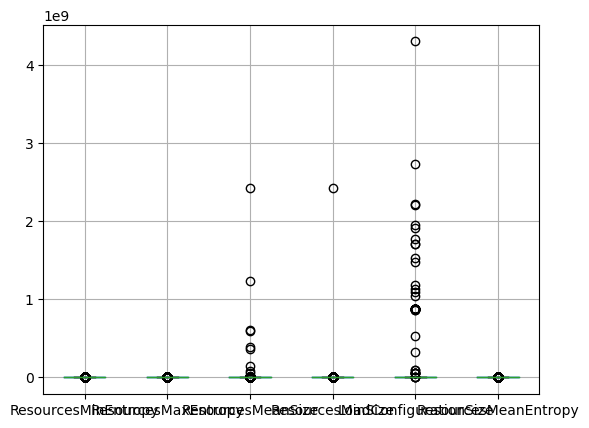

In [21]:
inner_join_df[["ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","LoadConfigurationSize",
              "ResourcesMeanEntropy"]].boxplot()
plt.show()

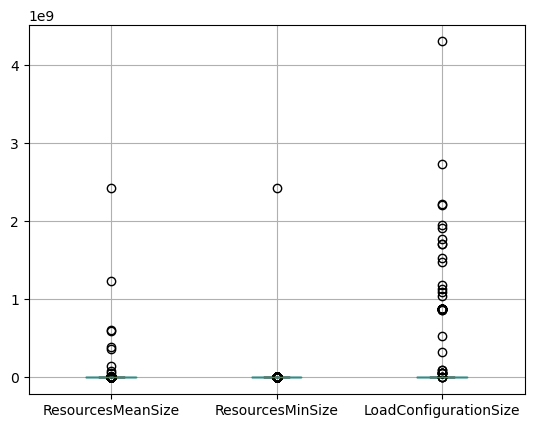

In [22]:
#data2 = inner_join_df[["ResourcesMeanSize","ResourcesMinSize","LoadConfigurationSize"]].boxplot
#data2
inner_join_df[["ResourcesMeanSize","ResourcesMinSize","LoadConfigurationSize"]].boxplot()
plt.show()

In [23]:
data2=inner_join_df[["ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","LoadConfigurationSize",
              "ResourcesMeanEntropy"]]

In [24]:
Q1=data2.quantile(0.25)
Q3=data2.quantile(0.75)
IQR = Q3- Q1

In [25]:
IQR

ResourcesMinEntropy         0.533827
ResourcesMaxEntropy         1.807538
ResourcesMeanSize        5610.428571
ResourcesMinSize          126.000000
LoadConfigurationSize      72.000000
ResourcesMeanEntropy        0.769114
dtype: float64

In [26]:
out_rows = ((data2 < (Q1-1.5*IQR))| (data2 > (Q3+1.5*IQR))).any(axis=1)

In [27]:
#inner_join_df[["ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","LoadConfigurationSize",
#              "ResourcesMeanEntropy"]]
inner_join_df = inner_join_df[~out_rows]

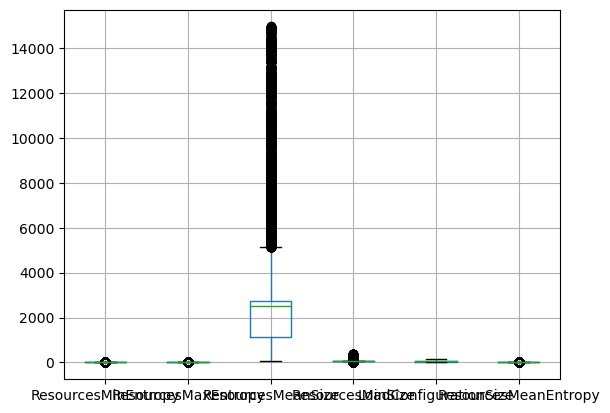

In [28]:
inner_join_df[["ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","LoadConfigurationSize",
              "ResourcesMeanEntropy"]].boxplot()
plt.show()   

In [29]:
inner_join_df[["ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize","LoadConfigurationSize",
              "ResourcesMeanEntropy"]].describe()

,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,LoadConfigurationSize,ResourcesMeanEntropy
count,69320.000000,69320.000000,69320.000000,69320.000000,69320.000000,69320.000000
mean,2.398170,5.303677,2451.852549,70.624986,41.155049,3.674265
std,0.329948,0.997927,2039.785848,63.395989,36.694616,0.405374
min,1.384776,2.458696,56.000000,0.000000,0.000000,2.309135
25%,2.224773,5.084524,1138.800000,48.000000,0.000000,3.419444
50%,2.458492,5.317552,2517.600000,48.000000,72.000000,3.689390
75%,2.500159,5.317552,2739.500000,48.000000,72.000000,3.776760
max,3.519929,8.000000,14964.625000,362.000000,160.000000,5.376051


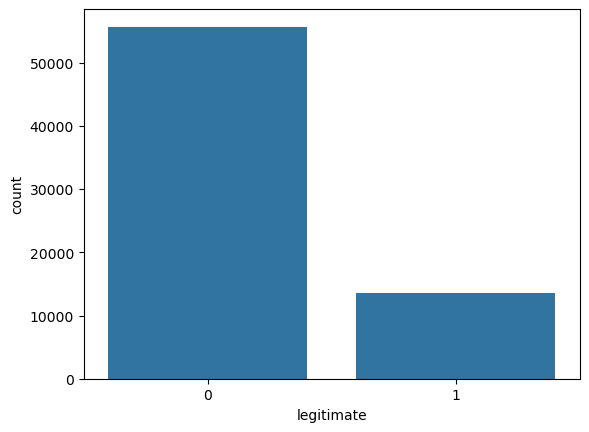

In [30]:
sns.countplot(data=inner_join_df,x=inner_join_df["legitimate"])
plt.show() # ---> 

In [31]:
data = inner_join_df[["cpu_temperature","CPU Load (%)","Idle Time (%)","Clock Readings (GHz)","Memory Usage (GB)","ResourcesMinEntropy","ResourcesMaxEntropy","ResourcesMeanSize","ResourcesMinSize",
              "ResourcesMeanEntropy","legitimate"]]

In [48]:
data.head()

,cpu_temperature,CPU Load (%),Idle Time (%),Clock Readings (GHz),Memory Usage (GB),ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMeanEntropy,legitimate
0,68.04,26.952590,7.384035,2.351770,15.101969,2.568844,3.537939,8797.00000,216,3.262823,1
3,49.20,51.370156,50.853750,2.121779,8.519494,2.669314,6.400720,1457.00000,90,4.364291,1
5,51.44,36.441177,47.333318,2.131194,6.242722,2.718577,7.965023,3858.60000,104,4.843545,1
7,63.08,85.961203,67.304032,3.711262,13.610758,1.664392,6.373890,11939.68966,94,4.102636,1
8,63.28,49.156884,72.650221,1.219931,2.625544,3.435993,5.929812,616.50000,94,5.097499,1


In [33]:
# train test splitting
# cpu_temperature	CPU Load (%)	Idle Time (%)	Clock Readings (GHz)	Memory Usage (GB)	ResourcesMinEntropy	ResourcesMaxEntropy	ResourcesMeanSize	ResourcesMinSize	ResourcesMeanEntropy	legitimate
x= data.iloc[:,:10]
y = data.iloc[:,10]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
# 1. Data Preprocessing
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [36]:
# 2. Feature Engineering
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

In [37]:
# model selection 
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(x_test_scaled, y_test))



Epoch 1/30


1733/1733 [==============================] - 7s 3ms/step - loss: 0.3020 - accuracy: 0.8994 - val_loss: 0.2325 - val_accuracy: 0.9212
Epoch 2/30
1733/1733 [==============================] - 4s 3ms/step - loss: 0.2487 - accuracy: 0.9179 - val_loss: 0.2220 - val_accuracy: 0.9232
Epoch 3/30
1733/1733 [==============================] - 4s 2ms/step - loss: 0.2409 - accuracy: 0.9185 - val_loss: 0.2170 - val_accuracy: 0.9242
Epoch 4/30
1733/1733 [==============================] - 4s 2ms/step - loss: 0.2342 - accuracy: 0.9204 - val_loss: 0.2114 - val_accuracy: 0.9222
Epoch 5/30
1733/1733 [==============================] - 4s 2ms/step - loss: 0.2308 - accuracy: 0.9208 - val_loss: 0.2085 - val_accuracy: 0.9218
Epoch 6/30
1733/1733 [==============================] - 4s 3ms/step - loss: 0.2302 - accuracy: 0.9205 - val_loss: 0.2063 - val_accuracy: 0.9230
Epoch 7/30
1733/1733 [==============================] - 4s 3ms/step - loss: 0.2286 - accuracy: 0.9200 - val_loss: 0.2057 - val_accur

In [47]:
y_pred = model.predict(x_test_scaled)

434/434 [==============================] - 1s 2ms/step


In [39]:
threshold = 0.5  # adjesed the vales
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

In [40]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.9255626081938835


In [41]:
confusion_matrix(y_test,y_pred_binary)

array([[10978,   237],
       [  795,  1854]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     11215
           1       0.89      0.70      0.78      2649

    accuracy                           0.93     13864
   macro avg       0.91      0.84      0.87     13864
weighted avg       0.92      0.93      0.92     13864



In [43]:
#param_grid = {'hidden_layer_sizes': [(64,), (128,), (256,)], 'activation': ['relu', 'tanh']}
#grid_search = GridSearchCV(model, param_grid, cv=3)
#grid_search.fit(x_train_scaled, y_train)
#best_model = grid_search.best_estimator_

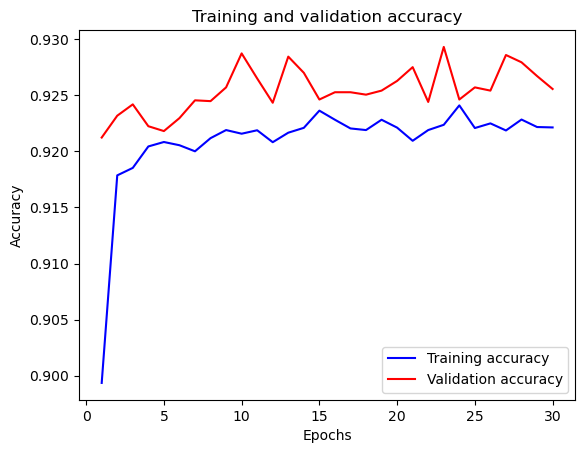

In [44]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

In [ ]:
#param_grid = {'hidden_layer_sizes': [(64,), (128,), (256,)], 'activation': ['relu', 'tanh']}
#grid_search = GridSearchCV(model, param_grid, cv=3)
#grid_search.fit(X_train_scaled, y_train)
#best_model = grid_search.best_estimator_